In [188]:
#pip install -i https://test.pypi.org/simple/ search3D==0.1.0

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [1]:
import search3D
from search3D import plot_3D as p3D

In [14]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from mpl_toolkits.mplot3d import Axes3D

import pydotplus
from sklearn import tree
from IPython.display import Image

Lettura del dataset

In [15]:
path = "../DataSet/"
df = pd.read_csv(path + 'Dataset_Final.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NotValid,TotalSatisfaction,ProbablyLeave
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,20,2.0,2,8.0,7,2,13,False,11,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,21,3.0,3,1.0,8,1,6,True,11,1
2,36.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,7,4.0,3,1.0,5,1,2,False,13,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,12,1.0,3,3.0,7,0,7,False,9,1
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,2,3.0,3,10.0,2,2,1,True,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,No,Travel_Rarely,890,Sales,2,3,Marketing,4,Male,...,2,3.0,3,8.0,2,2,2,True,12,0
1466,44.0,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,3,Male,...,6,5.0,3,4.0,2,1,2,False,9,0
1467,30.0,No,Travel_Rarely,163,Research & Development,24,1,Technical Degree,4,Male,...,9,3.0,2,1.0,4,1,4,False,15,0
1468,36.0,No,Travel_Frequently,457,Research & Development,26,2,Other,2,Male,...,4,3.0,2,8.0,2,1,3,True,9,1


In [16]:
class_name = 'Attrition'

# Trasformazione variabili
- Categoriche => One Hot Encoding

In [17]:
cat_features=["BusinessTravel", "Department", "EducationField","MaritalStatus", "JobRole", "OverTime"]
enc = OneHotEncoder(handle_unknown='ignore')
X = df[cat_features]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [18]:
df_copy = df.copy()

In [19]:
df_copy["IsMale"] = [1 if x else 0 for x in df_copy["Gender"] == "Male"]
df_copy["NotValid"] = [1 if x else 0 for x in df_copy["NotValid"] == True]
df_copy["Attrition"] = [1 if x else 0 for x in df_copy["Attrition"] == "Yes"]
df_copy["ProbablyLeave"] = [1 if x else 0 for x in df_copy["ProbablyLeave"] == "Yes"]

df_copy = df_copy.drop(columns = ["Gender"])

In [20]:
cat_features=["BusinessTravel", "Department", "EducationField","MaritalStatus", "JobRole", "OverTime"]
enc = OneHotEncoder(handle_unknown='ignore')
X = df_copy[cat_features]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [21]:
df_copy=df_copy.drop(columns = cat_features)
df_copy[enc.get_feature_names(cat_features)] = enc.transform(X).toarray()

In [22]:
df_copy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes
0,52.0,0,593,9,4,2,88,3,3,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,36.0,0,1218,1,1,2,52,3,5,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,36.0,0,530,16,3,3,36,3,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,33.0,0,953,5,4,2,65,3,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,37.0,0,1380,9,2,3,75,3,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Numeriche => RobustScaler

In [23]:
df_normalized = df_copy.copy()

In [24]:
numeric_features = ["Age", "DailyRate", "DistanceFromHome", "Education", "HourlyRate",
                   "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome",
                   "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
                   "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance",
                   "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
                   "YearsWithCurrManager", "TotalSatisfaction"]

In [25]:
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_normalized[numeric_features])
df_normalized[numeric_features] = scaled_features

## Definizione funzioni per stampare e plottare risultati

In [26]:
# Funzione che viene chiamata sul:
# - y_true: target reale
# - y_pred: target predetto dal classificatore
# stampa: matrice di confusione, accuracy, precision, recall, specificity, F1
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)    
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, False)
    print("Numero di campioni correttamente correlati: ", accuracy)    
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)   
    print("____________________________________________")    

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")    

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")   
    
    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall, 
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")   
    
    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_true, y_pred))
    
    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [27]:
# La funzione stampa il ROC curve

# Prima di chiamare questa funzione dobbiamo aver
# scritto in y_pred il valore di ".predict" che come output fornirà 0 o 1
# dentro a y_score il valore di ".predict_proba" che darà solo la probabilità di 1
def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")
    fprate, tprate, threashold = roc_curve(y_test, y_score[:, 1])
    auc_score = auc(fprate, tprate)
    plt.plot(fprate, tprate, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")    
    print(roc_auc_score(y_test, y_score[:,1]))    
    
    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()
    
    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()
    

    print("____________________________________")
    print("****** Cumulative gain: con metodo diretto *******")
    plot_cumulative_gain(y_test, y_score)
    plt.show()
    
    
    print("____________________________________")
    print("****** Lift curve: con metodo diretto *******")    
    plot_lift_curve(y_test, y_score)
    plt.show()

## Funzione per plottare il learning curve

In [28]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    return plt
"""
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
"""
    

'\n    # Plot n_samples vs fit_times\n    axes[1].grid()\n    axes[1].plot(train_sizes, fit_times_mean, \'o-\')\n    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,\n                         fit_times_mean + fit_times_std, alpha=0.1)\n    axes[1].set_xlabel("Examples")\n    axes[1].set_ylabel("fit_times")\n    axes[1].set_title("Scalability of the model")\n\n    # Plot fit_time vs score\n    axes[2].grid()\n    axes[2].plot(fit_times_mean, test_scores_mean, \'o-\')\n    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,\n                         test_scores_mean + test_scores_std, alpha=0.1)\n    axes[2].set_xlabel("fit_times")\n    axes[2].set_ylabel("Score")\n    axes[2].set_title("Performance of the model")\n'

Divisione in Training e Test

In [105]:
attributes = [col for col in df_normalized.columns if col !=class_name]

X = df_normalized[attributes].values
y = df_normalized[class_name]

# ------- Test DecisionTree tutte le Features -------

# GridSearch

In [39]:
def builtGridSearch(X, y, split_size, tuned_parameters, scores, kfold, folder):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=1000, stratify = y)
    optimals = {}
    for score in scores:
        print("------- Score = " + str(score) + " ------- \n")
        model = tree.DecisionTreeClassifier()
        k_fold = StratifiedKFold(n_splits=kfold, random_state=42)
        
        print("> Fold = " + str(k_fold) + "\n")
        clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)

        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        
        print("\n> Grid scores:\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
        parameters = {"criterion": [], "max_depth": [], "min_samples_leaf": [], "min_samples_split": []}
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
            parameters["criterion"].append(params["criterion"])

            if(params["max_depth"] == None):
                parameters["max_depth"].append(0)
            else:
                parameters["max_depth"].append(params["max_depth"])

            #parameters["max_depth"].append(params["max_depth"])
            parameters["min_samples_leaf"].append(params["min_samples_leaf"])
            parameters["min_samples_split"].append(params["min_samples_split"])
        
        print("-> Report\n") 
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print("\n")
        print("**** Matrice di Confusione *****")
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        print(' True negative: %d False negative: %d' % (tn, fn))
        print(' True positive: %d False positive: %d' % (tp, fp))

        
        # Creazione del csv
        d = {score: means, 'std_dev': stds*2, 'criterion': parameters["criterion"], "max_depth": parameters["max_depth"], "min_samples_leaf": parameters["min_samples_leaf"], "min_samples_split": parameters["min_samples_split"]}
        
        dataF = pd.DataFrame(data=d)
        
        dataF.to_csv("./" + folder+ "/"+ score+"_resultDT.csv",index=False, header=True)
        

        print("...........RESULTS FOR TRAINING.........")
        print("........................................")
        means = clf.cv_results_['mean_train_score']
        stds = clf.cv_results_['std_train_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))        
        
        print("____________________________________________")
        
        optimals[score] = best
    return optimals

Parametri da tunare

In [41]:
tuned_parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

In [42]:
scores = ["recall", "f1", "roc_auc"]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify = y)
optimal = builtGridSearch(X_train, y_train, 0.3, tuned_parameters, scores, 5, "DecisionTree/GridSearch")

------- Score = recall ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

> Grid scores:

0.344 (+/-0.225) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.344 (+/-0.215) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.319 (+/-0.225) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.275 (+/-0.136) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.293 (+/-0.242) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.293 (+/-0.240) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.309 (+/-0.293) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.309 (+/-0.293) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

> Grid scores:

0.297 (+/-0.100) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.314 (+/-0.188) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.340 (+/-0.202) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.286 (+/-0.102) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.318 (+/-0.154) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.356 (+/-0.174) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.319 (+/-0.178) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.331 (+/-0.182) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}

> Grid scores:

0.614 (+/-0.136) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.603 (+/-0.113) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.603 (+/-0.146) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.627 (+/-0.118) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.640 (+/-0.143) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.630 (+/-0.107) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.622 (+/-0.081) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.624 (+/-0.106) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 

In [180]:
optimal

{'recall': {'criterion': 'gini',
  'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'f1': {'criterion': 'gini',
  'max_depth': 2,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'roc_auc': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 20,
  'min_samples_split': 2}}

- Optimal Recall

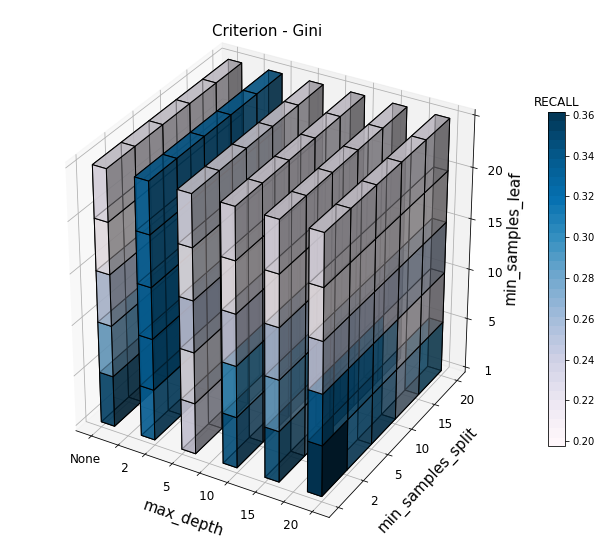

In [22]:
x_ticks = ["", "None", "       2", "","5", "       10", "", "15 ", "       20"]
y_ticks = ["", "", "2", "5",  "10", "15", "20"]
z_ticks = ["    1","     5", "     10", "    15", "   20"]

ax, fig , cbr= p3D.heatmap_3d(path = "./DecisionTree/GridSearch/recall_resultDT.csv", metric = "recall", optimal = [20, 2, 1], 
            crt = ("criterion",'gini'), 
            param1 = "max_depth",
            param2 = "min_samples_split",
            param3 = "min_samples_leaf",
            modul=2)

ax.set_xticklabels(x_ticks, fontsize=12)
ax.set_yticklabels(y_ticks, fontsize=12)
ax.set_zticklabels(z_ticks, fontsize=12)
ax.set_xlabel("max_depth", fontsize=15, labelpad=10)
ax.set_ylabel("min_samples_split", fontsize=15, labelpad=10)
ax.set_zlabel("min_samples_leaf", fontsize=15, labelpad=10)
ax.set_title("Criterion - Gini", fontsize=15, loc='center', pad=15)
ax.view_init(30,300)

fig.savefig("./DecisionTree/Immagini/DT_All_recall.png", format="png")

- Optimal F1

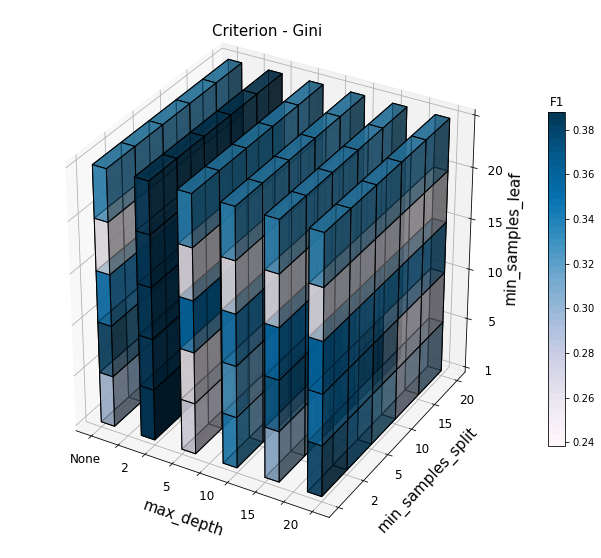

In [26]:
x_ticks = ["", "None", "       2", "","5", "       10", "", "15 ", "       20"]
y_ticks = ["", "", "2", "5",  "10", "15", "20"]
z_ticks = ["    1","     5", "     10", "    15", "   20"]

ax, fig, cbr = p3D.heatmap_3d(path = "./DecisionTree/GridSearch/f1_resultDT.csv", metric = "f1", optimal = [2, 2, 1], 
            crt = ("criterion",'gini'), 
            param1 = "max_depth",
            param2 = "min_samples_split",
            param3 = "min_samples_leaf",
            modul=2)

ax.set_xticklabels(x_ticks, fontsize=12)
ax.set_yticklabels(y_ticks, fontsize=12)
ax.set_zticklabels(z_ticks, fontsize=12)
ax.set_xlabel("max_depth", fontsize=15, labelpad=10)
ax.set_ylabel("min_samples_split", fontsize=15, labelpad=10)
ax.set_zlabel("min_samples_leaf", fontsize=15, labelpad=10)
ax.set_title("Criterion - Gini", fontsize=15, loc='center', pad=15)
ax.view_init(30,300)

fig.savefig("./DecisionTree/Immagini/DT_All_f1.png", format="png")

- Optimal ROC_AUC

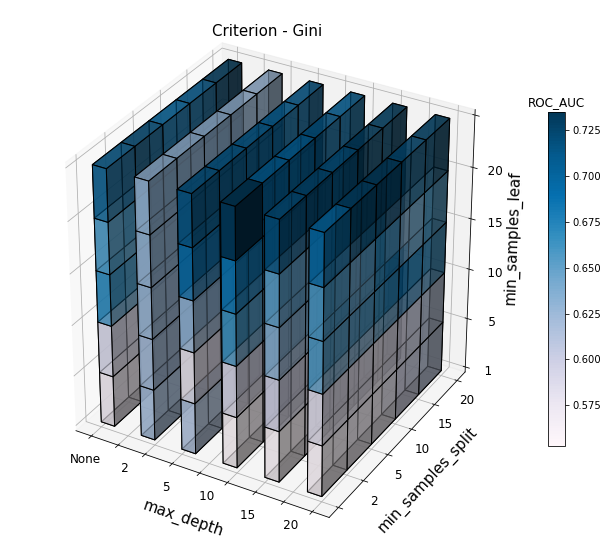

In [27]:
x_ticks = ["", "None", "       2", "","5", "       10", "", "15 ", "       20"]
y_ticks = ["", "", "2", "5",  "10", "15", "20"]
z_ticks = ["    1","     5", "     10", "    15", "   20"]

ax, fig, cbr = p3D.heatmap_3d(path = "./DecisionTree/GridSearch/roc_auc_resultDT.csv", metric = "roc_auc", optimal = [10, 2, 20], 
            crt = ("criterion",'gini'), 
            param1 = "max_depth",
            param2 = "min_samples_split",
            param3 = "min_samples_leaf",
            modul=2)

ax.set_xticklabels(x_ticks, fontsize=12)
ax.set_yticklabels(y_ticks, fontsize=12)
ax.set_zticklabels(z_ticks, fontsize=12)
ax.set_xlabel("max_depth", fontsize=15, labelpad=10)
ax.set_ylabel("min_samples_split", fontsize=15, labelpad=10)
ax.set_zlabel("min_samples_leaf", fontsize=15, labelpad=10)
ax.set_title("Criterion - Gini", fontsize=15, loc='center', pad=15)
ax.view_init(30,300)

fig.savefig("./DecisionTree/Immagini/DT_All_Roc.png", format="png")

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

- Risultati per configurazione di Recall

309
309
**** Matrice di Confusione *****
 True negative: 223 False negative: 31
 True positive: 19 False positive: 36
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.7832
Numero di campioni correttamente correlati:  242
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.3455
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.3800
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8610
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3619
____________________________________________
              precision    recall  f1-sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


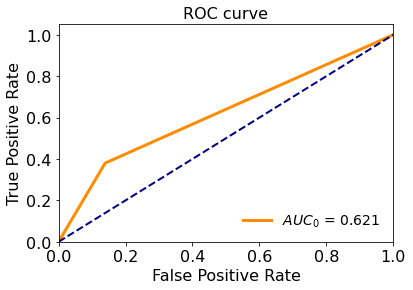

____________________________________
****** VALORE DI AUC *******
0.6205019305019305
____________________________________
****** ROC CURVE: con metodo diretto *******


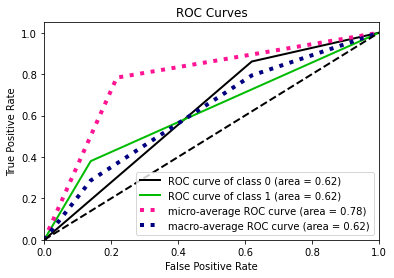

____________________________________
****** Precision recall: con metodo diretto *******


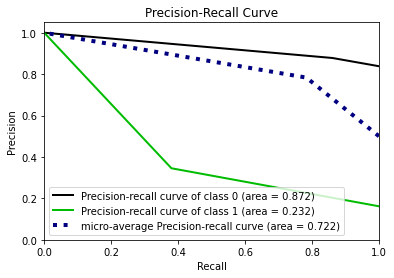

____________________________________
****** Cumulative gain: con metodo diretto *******


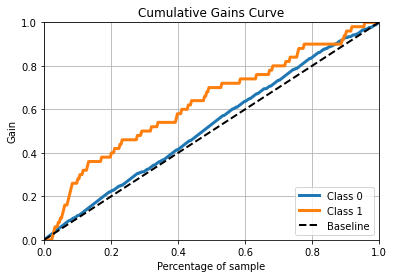

____________________________________
****** Lift curve: con metodo diretto *******


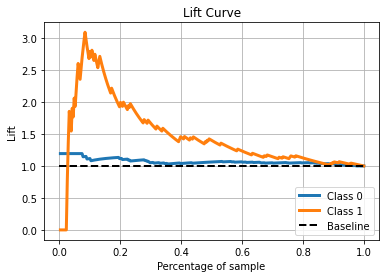

In [41]:
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 20, min_samples_leaf = 1, min_samples_split = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

- Risultati per configurazione di F1

**** Matrice di Confusione *****
 True negative: 240 False negative: 37
 True positive: 13 False positive: 19
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8188
Numero di campioni correttamente correlati:  253
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.4062
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.2600
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9266
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3171
____________________________________________
              precision    recall  f1-score   sup

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


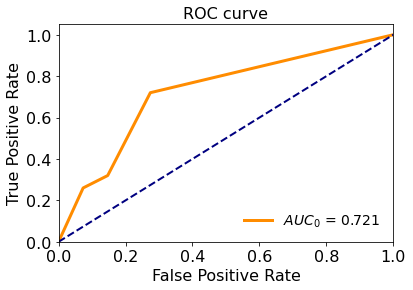

____________________________________
****** VALORE DI AUC *******
0.7213127413127414
____________________________________
****** ROC CURVE: con metodo diretto *******


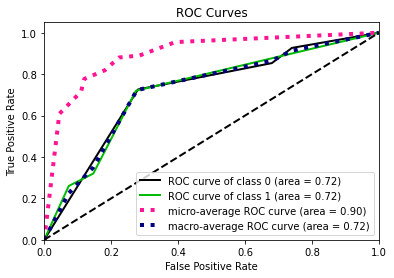

____________________________________
****** Precision recall: con metodo diretto *******


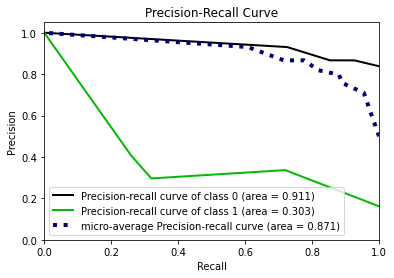

____________________________________
****** Cumulative gain: con metodo diretto *******


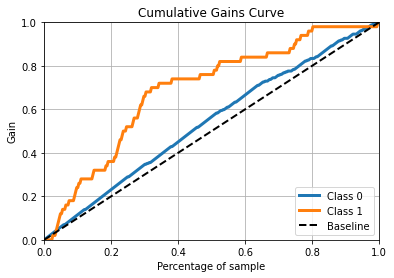

____________________________________
****** Lift curve: con metodo diretto *******


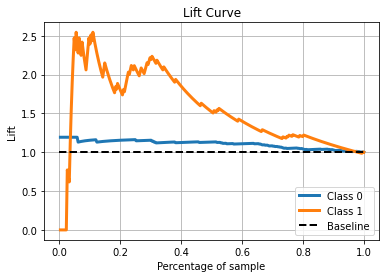

In [42]:
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2, min_samples_leaf = 1, min_samples_split = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

- Risultati per configurazione di ROC_AUC

**** Matrice di Confusione *****
 True negative: 252 False negative: 35
 True positive: 15 False positive: 7
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8641
Numero di campioni correttamente correlati:  267
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.6818
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.3000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9730
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.4167
____________________________________________
              precision    recall  f1-score   supp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


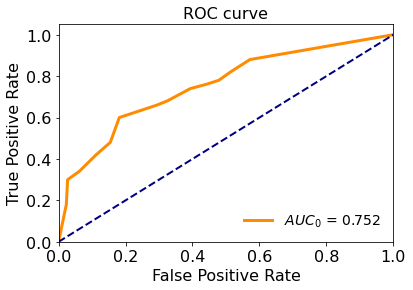

____________________________________
****** VALORE DI AUC *******
0.7518532818532818
____________________________________
****** ROC CURVE: con metodo diretto *******


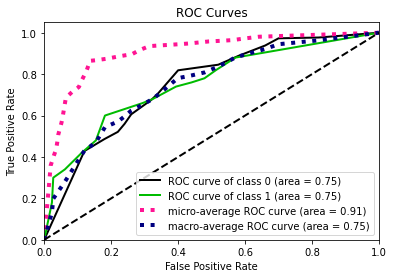

____________________________________
****** Precision recall: con metodo diretto *******


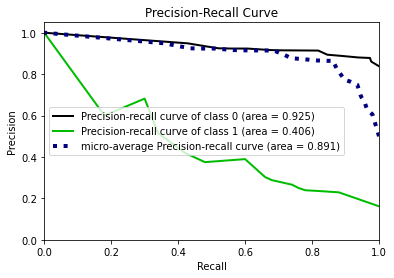

____________________________________
****** Cumulative gain: con metodo diretto *******


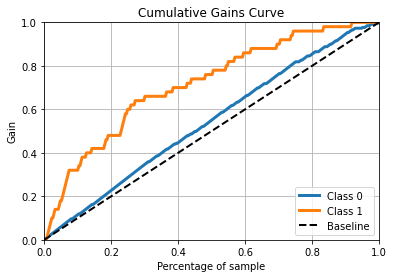

____________________________________
****** Lift curve: con metodo diretto *******


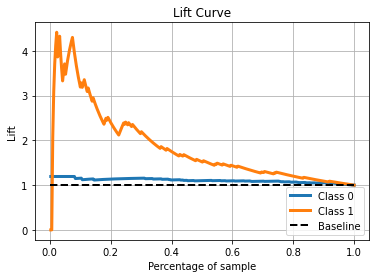

In [43]:
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 20, min_samples_split = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

# Learning Curve Decision Tree

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

In [89]:
def plot_dt3(X, y):
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 20, min_samples_leaf = 1, min_samples_split = 2)
    title = "Optimal Parameters for Recall"
    plot_learning_curve(estimator, title, X, y, axes=axes[0], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2, min_samples_leaf = 1, min_samples_split = 2)
    title = "Optimal Parameters for F1"
    plot_learning_curve(estimator, title, X, y, axes=axes[1], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 20, min_samples_split = 2)
    title = "Optimal Parameters for ROC_AUC"
    plot_learning_curve(estimator, title, X, y, axes=axes[2], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    plt.show()

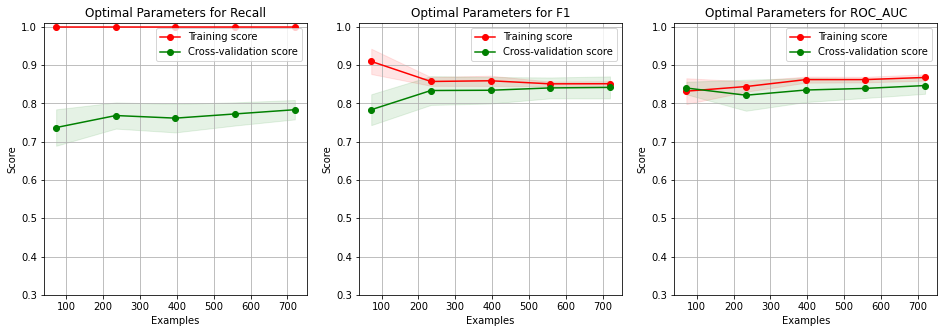

In [90]:
plot_dt3(X_train, y_train)

In [94]:
def builtPartiSearch(X, y, split_size, tuned_parameters, scores, kfold, folder):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=1000, stratify = y)
    optimals = {}
    for score in scores:
        print("------- Score = " + str(score) + " ------- \n")
        model = tree.DecisionTreeClassifier()
        k_fold = StratifiedKFold(n_splits=kfold, random_state=42)
        
        print("> Fold = " + str(k_fold) + "\n")
        clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)

        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        
        print("\n> Grid scores:\n")
        means_val = clf.cv_results_['mean_test_score']
        means_train = clf.cv_results_['mean_train_score']
        
        for mean, std, params in zip(means_val, means_train, clf.cv_results_['params']):
            print("%0.3f %0.03f for %r"
                  % (mean, std, params))
            
        optimals[score] = best
    return optimals

Parametri da tunare

In [95]:
tuned_parameters = {
    'criterion' : ['gini'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 20]
}

In [96]:
scores = ["f1", "roc_auc"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify = y)
optimal = builtPartiSearch(X_train, y_train, 0.3, tuned_parameters, scores, 5, "DecisionTree/GridSearch")

------- Score = f1 ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

> Grid scores:

0.388 0.413 for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.388 0.413 for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.308 0.665 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.318 0.357 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.313 0.946 for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.318 0.357 for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}
------- Score = roc_auc ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}

> Grid scores:

0.666 0.714 for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.680 0.716 for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.658 0.865 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.729 0.841 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.569 0.983 for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.725 0.868 for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

In [99]:
def plot_dt3(X, y):
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2, min_samples_leaf = 2, min_samples_split = 2)
    title = "Optimal Parameters"
    plot_learning_curve(estimator, title, X, y, axes=axes[0], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 20, min_samples_split = 2)
    title = "Optimal Parameters"
    plot_learning_curve(estimator, title, X, y, axes=axes[1], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 20, min_samples_split = 2)
    title = "Optimal Parameters"
    plot_learning_curve(estimator, title, X, y, axes=axes[2], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    plt.show()

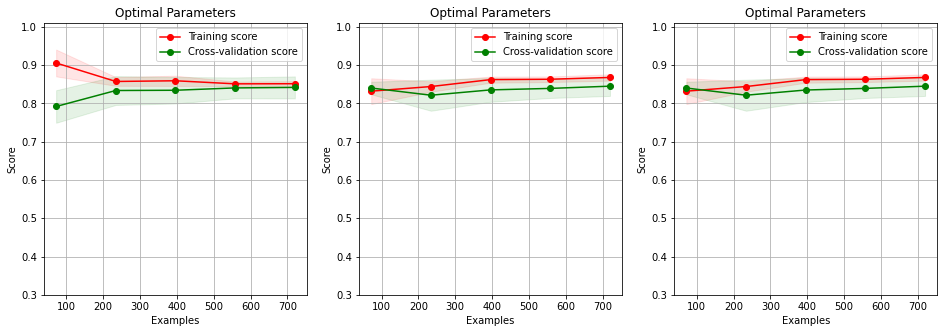

In [101]:
plot_dt3(X_train, y_train)

# Albero Completo - Configurazione scelta

In [29]:
# Modifichiamo il nome di Department_Research & Development perchè generebbe problemi nel plot
df_normalized.rename(columns={'Department_Research & Development':'Department_R_D'}, inplace=True)

In [30]:
attributes = [col for col in df_normalized.columns if col !=class_name]

X = df_normalized[attributes].values
y = df_normalized[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

Age 0.0
DailyRate 0.0
DistanceFromHome 0.0
Education 0.0
HourlyRate 0.0
JobInvolvement 0.0
JobSatisfaction 0.0
MonthlyIncome 0.0
MonthlyRate 0.0
PercentSalaryHike 0.0
PerformanceRating 0.0
RelationshipSatisfaction 0.0
TrainingTimesLastYear 0.0
YearsAtCompany 0.0
YearsInCurrentRole 0.0
YearsSinceLastPromotion 0.0
YearsWithCurrManager 0.0
NotValid 0.0
ProbablyLeave 0.0
IsMale 0.0
BusinessTravel_Non-Travel 0.0
BusinessTravel_Travel_Frequently 0.0
BusinessTravel_Travel_Rarely 0.0
Department_Human Resources 0.0
Department_R_D 0.0
Department_Sales 0.0
EducationField_Human Resources 0.0
EducationField_Life Sciences 0.0
EducationField_Marketing 0.0
EducationField_Medical 0.0
EducationField_Other 0.0
MaritalStatus_Divorced 0.0
MaritalStatus_Married 0.0
JobRole_Healthcare Representative 0.0
JobRole_Human Resources 0.0
JobRole_Laboratory Technician 0.0
JobRole_Manager 0.0
JobRole_Manufacturing Director 0.0
JobRole_Research Director 0.0
JobRole_Sales Executive 0.0
JobRole_Sales Representative 0.0


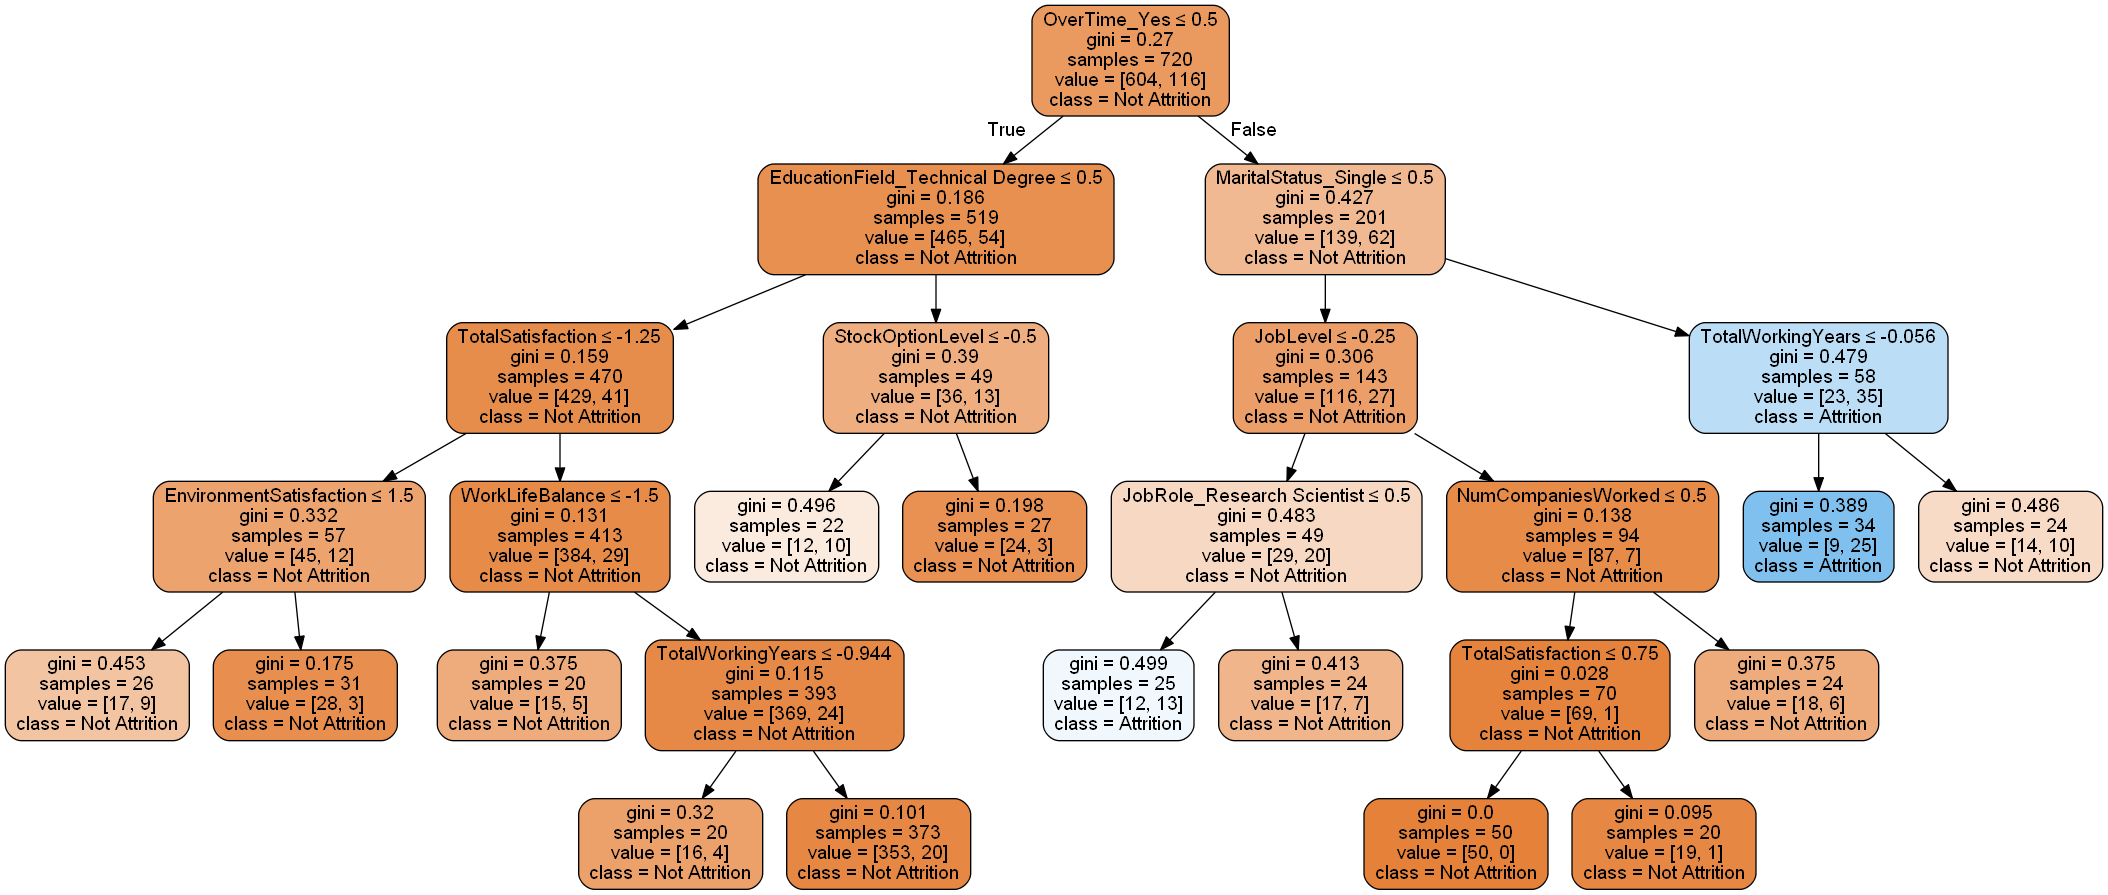

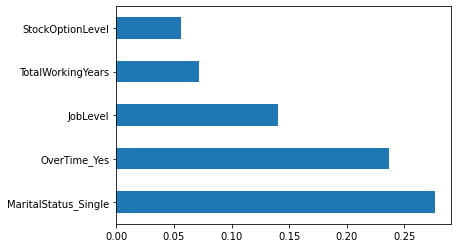

In [31]:
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 20, min_samples_split = 2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for col, imp in zipped:
    print(col, imp)

feat_importances = pd.Series(clf.feature_importances_, index=attributes)
feat_importances.nlargest(5).plot(kind='barh')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'Not Attrition' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=5)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Performance per la configurazione scelta

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

**** Matrice di Confusione *****
 True negative: 350 False negative: 51
 True positive: 20 False positive: 20
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8390
Numero di campioni correttamente correlati:  370
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.5000
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.2817
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9459
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3604
____________________________________________
              precision    recall  f1-score   sup

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


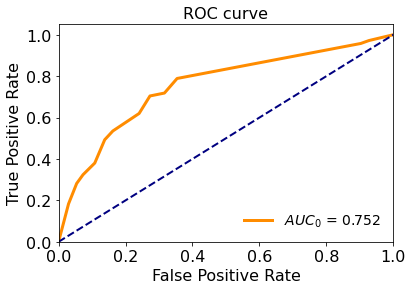

____________________________________
****** VALORE DI AUC *******
0.7524743052912066
____________________________________
****** ROC CURVE: con metodo diretto *******


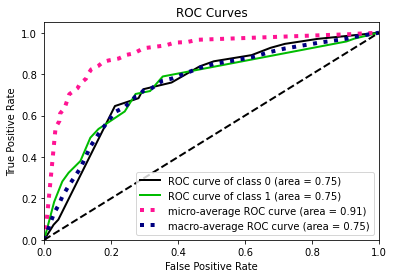

____________________________________
****** Precision recall: con metodo diretto *******


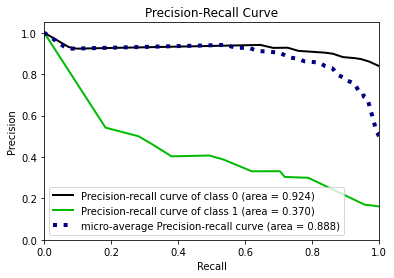

____________________________________
****** Cumulative gain: con metodo diretto *******


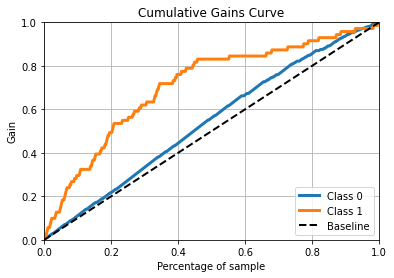

____________________________________
****** Lift curve: con metodo diretto *******


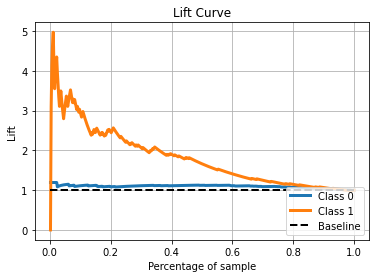

In [33]:
model  = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 20, min_samples_split = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result_pred(y_test, y_pred)
y_score = model.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

In [34]:
from sklearn.metrics import plot_confusion_matrix

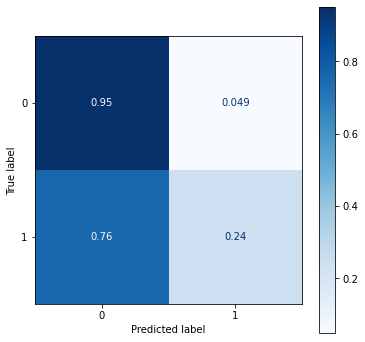

<Figure size 1440x1440 with 0 Axes>

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
cm = plt.get_cmap('Blues')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
model  = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 20, min_samples_split = 2)
model.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_confusion_matrix( model,X_test, y_test,  normalize = "true", cmap = cm, ax=axes)


# ---- Decision Tree con meno Features

In [37]:
features = ["MaritalStatus_Single", "OverTime_Yes", "JobLevel", 
            "TotalWorkingYears", "StockOptionLevel"]
X = df_normalized[features].values
y = df_normalized[class_name]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify = y)
optimal = builtGridSearch(X_train, y_train, 0.3, tuned_parameters, scores, 5, "DecisionTree/GridSearch/SelAttributes")

------- Score = recall ------- 

> Fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

> Grid scores:

0.234 (+/-0.122) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.250 (+/-0.034) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.276 (+/-0.066) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.267 (+/-0.060) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.302 (+/-0.096) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.232 (+/-0.112) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.232 (+/-0.112) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.232 (+/-0.112) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}

> Grid scores:

0.262 (+/-0.081) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.299 (+/-0.057) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.337 (+/-0.087) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.330 (+/-0.075) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.390 (+/-0.103) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.300 (+/-0.131) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.300 (+/-0.131) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.300 (+/-0.131) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

> Grid scores:

0.619 (+/-0.043) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.654 (+/-0.054) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.682 (+/-0.101) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.674 (+/-0.088) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.667 (+/-0.089) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.685 (+/-0.114) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.680 (+/-0.097) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.683 (+/-0.117) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split'

In [44]:
optimal

{'recall': {'criterion': 'gini',
  'max_depth': 2,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'f1': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 20},
 'roc_auc': {'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 2}}

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

309
309
**** Matrice di Confusione *****
 True negative: 240 False negative: 37
 True positive: 13 False positive: 19
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8188
Numero di campioni correttamente correlati:  253
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.4062
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.2600
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9266
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3171
____________________________________________
              precision    recall  f1-sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


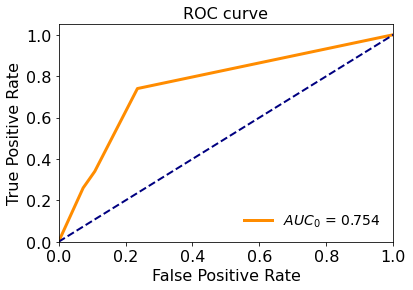

____________________________________
****** VALORE DI AUC *******
0.753861003861004
____________________________________
****** ROC CURVE: con metodo diretto *******


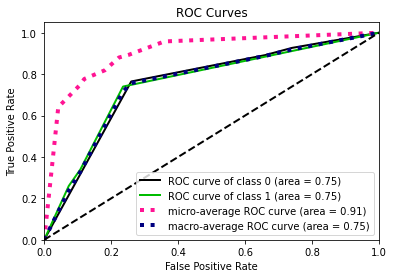

____________________________________
****** Precision recall: con metodo diretto *******


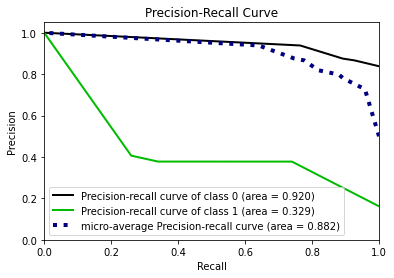

____________________________________
****** Cumulative gain: con metodo diretto *******


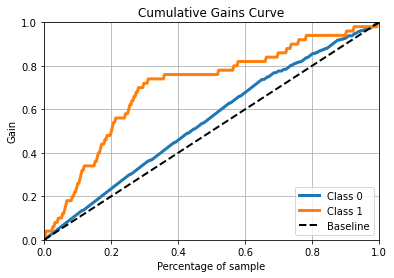

____________________________________
****** Lift curve: con metodo diretto *******


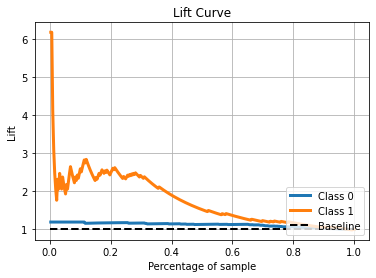

In [46]:
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2, min_samples_leaf = 1, min_samples_split = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

309
309
**** Matrice di Confusione *****
 True negative: 241 False negative: 35
 True positive: 15 False positive: 18
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8285
Numero di campioni correttamente correlati:  256
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.4545
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.3000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9305
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3614
____________________________________________
              precision    recall  f1-sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


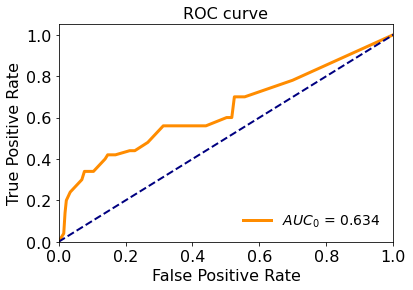

____________________________________
****** VALORE DI AUC *******
0.6344015444015445
____________________________________
****** ROC CURVE: con metodo diretto *******


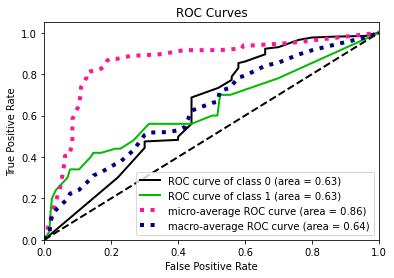

____________________________________
****** Precision recall: con metodo diretto *******


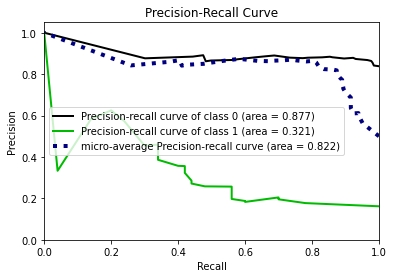

____________________________________
****** Cumulative gain: con metodo diretto *******


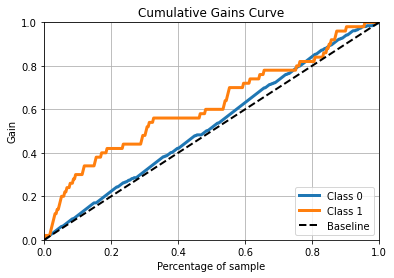

____________________________________
****** Lift curve: con metodo diretto *******


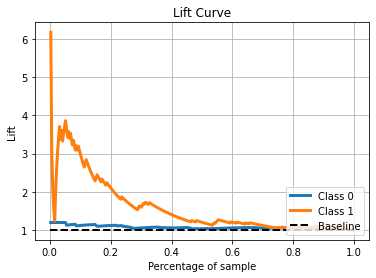

In [47]:
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 1, min_samples_split = 20)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

309
309
**** Matrice di Confusione *****
 True negative: 252 False negative: 39
 True positive: 11 False positive: 7
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8511
Numero di campioni correttamente correlati:  263
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.6111
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.2200
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9730
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.3235
____________________________________________
              precision    recall  f1-scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


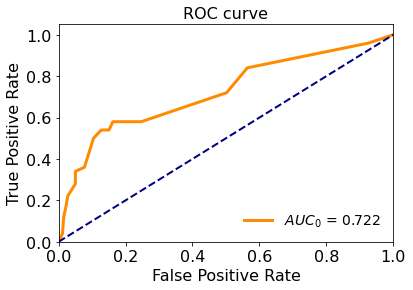

____________________________________
****** VALORE DI AUC *******
0.7220077220077219
____________________________________
****** ROC CURVE: con metodo diretto *******


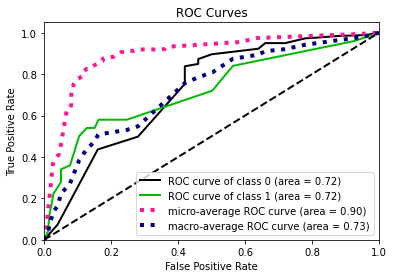

____________________________________
****** Precision recall: con metodo diretto *******


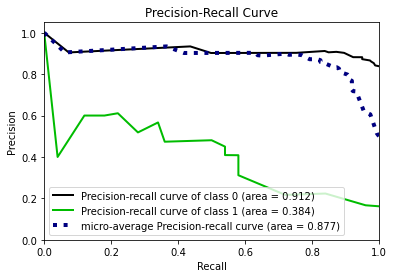

____________________________________
****** Cumulative gain: con metodo diretto *******


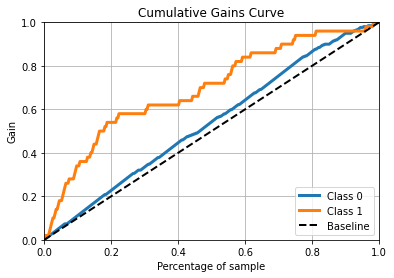

____________________________________
****** Lift curve: con metodo diretto *******


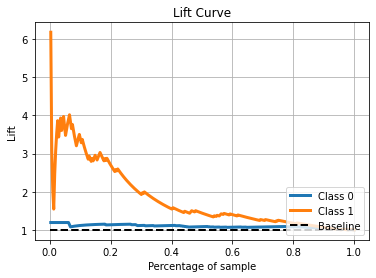

In [48]:
model = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 10, min_samples_split = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(len(y_pred))
print(len(y_val))
result_pred(y_val, y_pred)
y_score = model.predict_proba(X_val)
plot_res(y_pred, y_score, y_val)

# Learning Curve Decision Tree

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1000, stratify=y_train)

In [89]:
def plot_dt3(X, y):
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 20, min_samples_leaf = 1, min_samples_split = 2)
    title = "Optimal Parameters for Recall"
    plot_learning_curve(estimator, title, X, y, axes=axes[0], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2, min_samples_leaf = 1, min_samples_split = 2)
    title = "Optimal Parameters for F1"
    plot_learning_curve(estimator, title, X, y, axes=axes[1], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 20, min_samples_split = 2)
    title = "Optimal Parameters for ROC_AUC"
    plot_learning_curve(estimator, title, X, y, axes=axes[2], ylim=(0.3, 1.01),
                        cv=cv, n_jobs=10)
    plt.show()

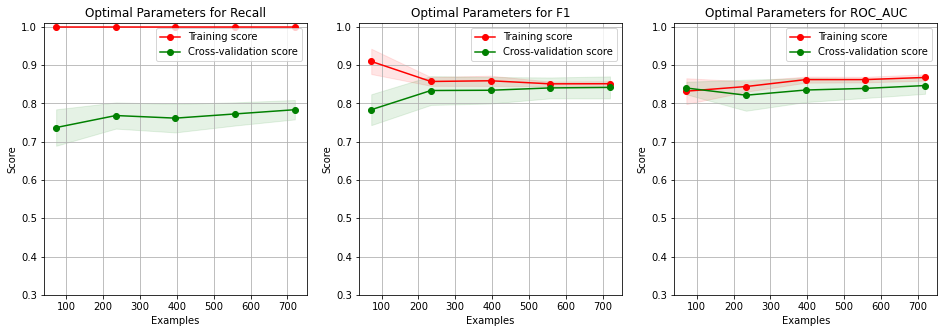

In [90]:
plot_dt3(X_train, y_train)